<a href="https://colab.research.google.com/github/harsh2k1/Project-Multiple-Disease-Prediction-Web-App/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold , StratifiedKFold
kfold = StratifiedKFold(n_splits=5)
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , plot_confusion_matrix , \
plot_precision_recall_curve, plot_roc_curve , roc_auc_score , recall_score
from sklearn.preprocessing import StandardScaler , RobustScaler , MinMaxScaler , LabelEncoder
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV , cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# print(xyz)

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

In [7]:
# Creating a dataframe to keep record of auc scores
model = []
roc_auc = []
def performance(new_model , new_score):
    model.append(new_model)
    roc_auc.append(new_score)
    score_df = pd.DataFrame(zip(model , roc_auc) , columns = ['Model', 'ROC_AUC_Score'])
    #print(score_df)
    return score_df

In [8]:
# Define a function to compute Precision, Recall and F1 score
model_name = []
precision_list = []
recall_list = []
F1_list = []
def get_pre_rec_f1(model , new_model_name):

    if new_model_name == 'Artificial Neural Network':
        model_name.append(new_model_name)
        proba = model.predict(X_test)
        y_pred_ann = (proba > 0.5)
        #y_pred_ann = clf_ann.predict(X_test)
        roc_auc_ann = roc_auc_score(y_test, y_pred_ann)
        tp, fp, fn, tn = confusion_matrix(y_test, y_pred_ann).ravel()
        precision = tp / (tp + fp)
        precision_list.append(precision)
        recall = tp / (tp + fn)
        recall_list.append(recall)
        F1 = (2 * precision * recall) / (precision + recall)
        F1_list.append(F1)
        evaluation_df = pd.DataFrame(zip(model_name , precision_list , recall_list , F1_list) , columns = \
                                 ['Model','Precision', 'Recall', 'F1_Score'])
        #print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')
        return evaluation_df
    else: 
        model_name.append(new_model_name)
        y_pred = model.predict(X_test)
        tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
        precision = tp / (tp + fp)
        precision_list.append(precision)
        recall = tp / (tp + fn)
        recall_list.append(recall)
        F1 = (2 * precision * recall) / (precision + recall)
        F1_list.append(F1)
        evaluation_df = pd.DataFrame(zip(model_name , precision_list , recall_list , F1_list) , columns = \
                                 ['Model','Precision', 'Recall', 'F1_Score'])
        #print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')
        return evaluation_df

## 1. ANN

In [9]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [10]:
clf_ann = Sequential()
clf_ann.add(Dense(16,input_dim = X.shape[1],kernel_initializer = 'normal',activation = 'relu'))
clf_ann.add(Dropout(0.1))
clf_ann.add(Dense(8,kernel_initializer = 'normal',activation = 'relu'))
clf_ann.add(Dropout(0.1))
clf_ann.add(Dense(1,activation = 'sigmoid'))
    
adam = Adam(lr = 0.1)
clf_ann.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
clf_ann.fit(X_train, y_train, epochs = 10, batch_size = 40)

Epoch 1/10
16/16 [==============================] - 1s 2ms/step - loss: 0.5952 - accuracy: 0.6889
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.7410
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.7476
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.7394
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7573
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7736
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7606
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7622
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7720
Epoch 10/10
16/16 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 0.7476


In [11]:
# Calculating ROC_AUC score

proba = clf_ann.predict(X_test)
y_pred_ann = (proba > 0.5)
#y_pred_ann = clf_ann.predict(X_test)
roc_auc_ann = roc_auc_score(y_test, y_pred_ann)
performance('Artificial Neural Network', roc_auc_ann)

,Model,ROC_AUC_Score
0,Artificial Neural Network,0.745455


In [12]:
get_pre_rec_f1(clf_ann , 'Artificial Neural Network')

,Model,Precision,Recall,F1_Score
0,Artificial Neural Network,0.818182,0.818182,0.818182


## 2. Random Forest

In [13]:
# Random Forest
# Hyperparameter tuning

# Create parameter grid  
param_grid = {
    'max_depth': [60, 90, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Instantiate the model
clf_rf = RandomForestClassifier()

# Instantiate grid search model
grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid,    
                          cv = 3, n_jobs = -1, verbose = 1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 60,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 300}

In [14]:
# Use the best parameters to fit the model

clf_rf = RandomForestClassifier(**grid_search.best_params_)   
clf_rf.fit(X_train,y_train)

scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 5)
roc_auc_rf = np.mean(scores)
performance('Random Forest',roc_auc_rf)

,Model,ROC_AUC_Score
0,Artificial Neural Network,0.745455
1,Random Forest,0.840407


In [15]:
get_pre_rec_f1(clf_rf,'Random Forest')

,Model,Precision,Recall,F1_Score
0,Artificial Neural Network,0.818182,0.818182,0.818182
1,Random Forest,0.818182,0.818182,0.818182


## 3. XGBoost

In [16]:
# XGBoost
from sklearn.model_selection import RandomizedSearchCV
# Number of trees
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.4,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }
print(random_grid_xgb)

{'n_estimators': array([200, 400, 600, 800]), 'gamma': array([0.1, 0.2, 0.3, 0.4]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'max_depth': [3, 4, 5, 6, 7], 'subsample': array([0.5, 0.6, 0.7, 0.8]), 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]), 'scale_pos_weight': [1, 3.5]}


In [17]:
# Use randomized search to find best parameters

xgboost = XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = xgboost, 
                                param_distributions = random_grid_xgb, 
                                n_iter = 5, 
                                cv = 3, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs = -1,
                                scoring ='roc_auc')


xgb_random.fit(X_train, y_train)   

print(xgb_random.best_params_,xgb_random.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[16:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'subsample': 0.7, 'scale_pos_weight': 3.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7} 0.824665458053374


In [18]:
# Use the best parameters to fit the model

clf_xgb = XGBClassifier(**xgb_random.best_params_)   
clf_xgb.fit(X_train,y_train)
scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 5)
roc_auc_xgb = np.mean(scores)
performance('XGBoost',roc_auc_xgb)

[16:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Model,ROC_AUC_Score
0,Artificial Neural Network,0.745455
1,Random Forest,0.840407
2,XGBoost,0.821876


In [19]:
get_pre_rec_f1(clf_xgb,'XGBoost')

,Model,Precision,Recall,F1_Score
0,Artificial Neural Network,0.818182,0.818182,0.818182
1,Random Forest,0.818182,0.818182,0.818182
2,XGBoost,0.707071,0.833333,0.765027


# Experimental Analysis

In [20]:
from sklearn.metrics import roc_curve, plot_roc_curve, plot_precision_recall_curve, precision_recall_curve

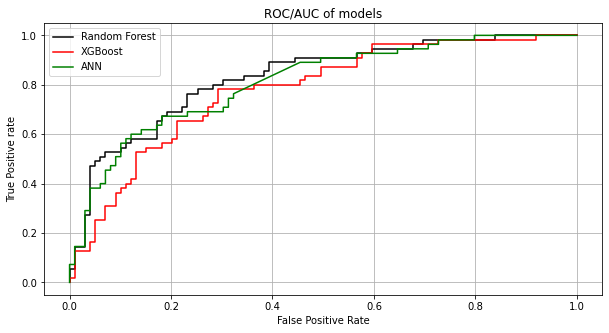

In [21]:
# Plot ROC_AUC curve of 3 models
 
fig,ax=plt.subplots(figsize=(10,5))

#plot_roc_curve(clf_lr, X_test, y_test,ax=ax, color="blue",label='Logistic Regression')
plot_roc_curve(clf_rf, X_test, y_test,ax=ax, color="black",label='Random Forest')
plot_roc_curve(clf_xgb, X_test, y_test,ax=ax, color="red",label='XGBoost')
#plot_roc_curve(clf_gnb , X_test , y_test , ax=ax , color = 'yellow' , label = 'Gaussian NB')
#plot_roc_curve(model , X_test , y_test , ax = ax , color = 'green' , label = 'ANN')

# ROC_AUC curve for ANN
proba = clf_ann.predict(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, proba, pos_label=1)
#plt.subplot(ax)
plt.plot(fpr1, tpr1,color='green', label='ANN')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')
plt.title('ROC/AUC of models')
plt.grid()
#plt.savefig('Comparison_of_models')

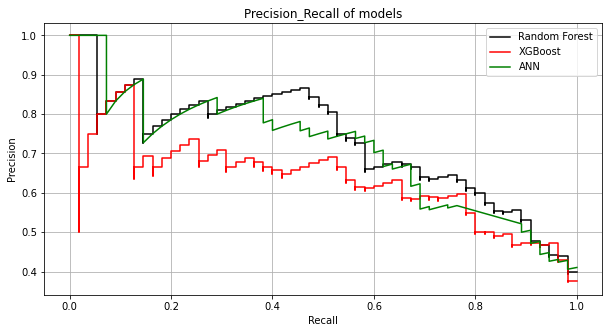

In [23]:
# Compare 3 models' Precision_recall curves

fig,ax=plt.subplots(figsize=(10,5))

#plot_precision_recall_curve(clf_lr, X_test, y_test, ax=ax,color="blue",label='Logistic Regression')
plot_precision_recall_curve(clf_rf, X_test, y_test, ax=ax,color="black",label='Random Forest')
plot_precision_recall_curve(clf_xgb, X_test, y_test, ax=ax,color="red",label='XGBoost')
#plot_precision_recall_curve(clf_gnb , X_test , y_test , ax = ax , color = 'yellow' , label = 'Gaussian NB')

# Precision-Recall curve  for ANN
proba = clf_ann.predict(X_test)
ann_precision, ann_recall, _ = precision_recall_curve(y_test, proba)
ann_f1, ann_auc = 0.818182, 0.81
plt.plot(ann_recall, ann_precision, label='ANN' , color = 'green')



plt.title('Precision_Recall of models')
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
#plt.savefig('PR model_comparison')